In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("carprices.csv")
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [3]:
df.describe()

,Mileage,Sell Price($),Age(yrs)
count,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692
std,19185.665055,8003.661021,1.652504
min,22500.000000,12000.000000,2.000000
25%,52000.000000,20000.000000,5.000000
50%,59000.000000,26100.000000,5.000000
75%,72000.000000,32000.000000,6.000000
max,91000.000000,40000.000000,8.000000


In [10]:
df.isna().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

In [4]:
import matplotlib.pyplot  as plt

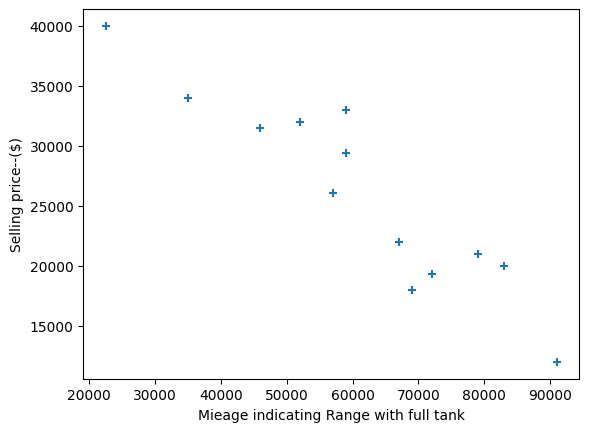

In [12]:
plt.scatter(x= df.Mileage,y=df["Sell Price($)"],marker="+")
plt.xlabel(xlabel = "Mieage indicating Range with full tank")
plt.ylabel("Selling price--($)")
plt.show()


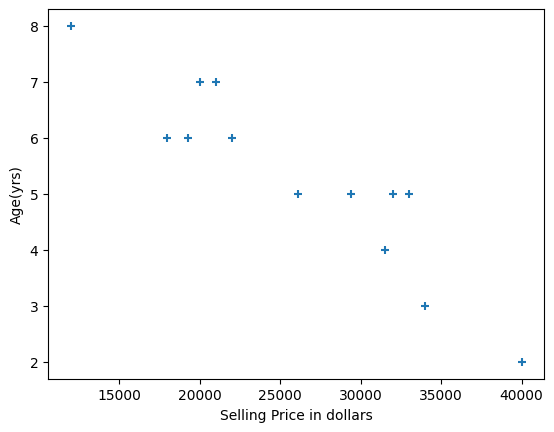

In [15]:
plt.scatter(x= df["Sell Price($)"],y=df["Age(yrs)"],marker="+")
plt.xlabel(xlabel = "Selling Price in dollars")
plt.ylabel("Age(yrs)")
plt.show()


In [16]:
dummies = pd.get_dummies(df["Car Model"])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
cols =["Car_model","Mileage","Selling_price","Age"]
df.columns = cols

In [29]:
df

,Car_model,Mileage,Selling_price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [32]:
dfle = df
dfle

,Car_model,Mileage,Selling_price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [33]:
dfle.Car_model = le.fit_transform(dfle.Car_model)
dfle

,Car_model,Mileage,Selling_price,Age
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [31]:
df

,Car_model,Mileage,Selling_price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [36]:
X = dfle[["Car_model","Mileage","Age"]].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [37]:
y=dfle.Selling_price

In [38]:
model = LinearRegression()



<Axes: xlabel='Age', ylabel='Selling_price'>

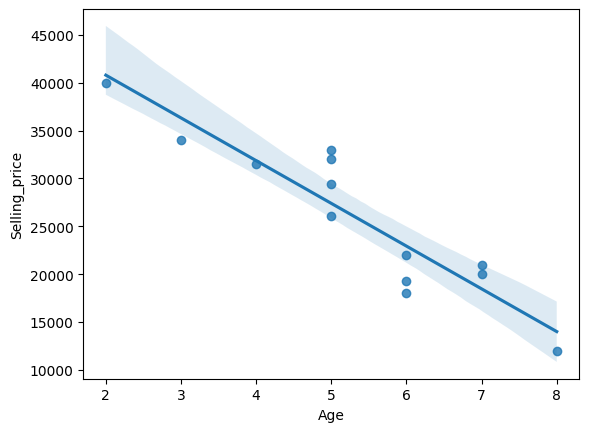

In [40]:
import seaborn as sns
sns.regplot(x = dfle.Age , y = dfle.Selling_price)

In [41]:
model.fit(X,y)

LinearRegression()

In [44]:
#1) Predict price of a mercedez benz that is 4 yr old with mileage 45000
model.predict([[2,45000,4]])

array([33336.7721827])

In [45]:
#2) Predict price of a BMW X5 that is 7 yr old with mileage 86000
model.predict([[1,86000,7]])

array([16106.74127344])

In [47]:
#3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())
model.score(X,y)

0.8719970367825953